In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('fer2013.csv') #Reading the FER2013 dataset
data.shape

(35887, 3)

In [4]:
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort = False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)

emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Disgust,547


Text(0.5, 0, 'Emotional Status')

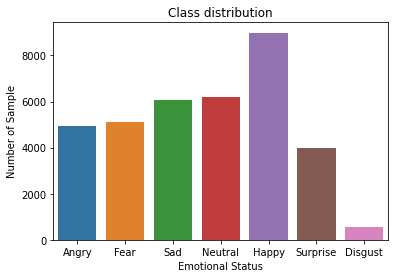

In [8]:
plt.figure()
# print('\n')
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number of Sample')
plt.xlabel('Emotional Status')

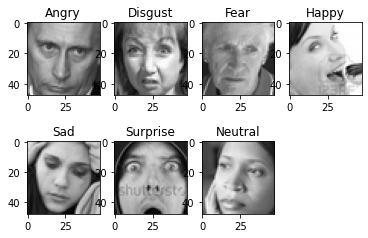

In [11]:
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48, 48)
    image = np.zeros((48, 48, 3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure()
for i in range(7):
    face = data[data['emotion'] == i].iloc[9]
    img = row2image(face)
    #   print('\n')
    plt.subplot(2, 4, i+1)
    plt.imshow(img[0])
    plt.title(img[1])
    #print(' ')


In [12]:
data_train = data[data['Usage'] == 'Training'].copy()
data_val = data[data['Usage'] == 'PublicTest'].copy()
data_test = data[data['Usage'] == 'PrivateTest'].copy()

print(data_train.shape, data_val.shape, data_test.shape)

(28709, 3) (3589, 3) (3589, 3)


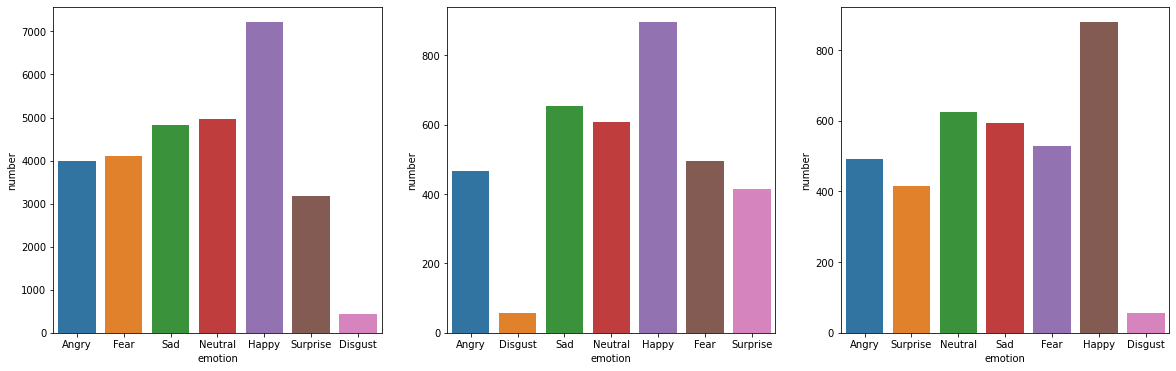

In [13]:
plt.figure(0, figsize = (20, 6))

train_emotion_counts = data_train['emotion'].value_counts(sort = False).reset_index()
train_emotion_counts.columns = ['emotion', 'number']
train_emotion_counts['emotion'] = train_emotion_counts['emotion'].map(emotion_map)
plt.subplot(1, 3, 1)
sns.barplot(train_emotion_counts.emotion, train_emotion_counts.number)

val_emotion_counts = data_val['emotion'].value_counts(sort = False).reset_index()
val_emotion_counts.columns = ['emotion', 'number']
val_emotion_counts['emotion'] = val_emotion_counts['emotion'].map(emotion_map)
plt.subplot(1, 3, 2)
sns.barplot(val_emotion_counts.emotion, val_emotion_counts.number)

test_emotion_counts = data_test['emotion'].value_counts(sort = False).reset_index()
test_emotion_counts.columns = ['emotion', 'number']
test_emotion_counts['emotion'] = test_emotion_counts['emotion'].map(emotion_map)
plt.subplot(1, 3, 3)
sns.barplot(test_emotion_counts.emotion, test_emotion_counts.number)

plt.show()